<a href="https://colab.research.google.com/github/MoghazyCoder/plant-species-identifier/blob/master/Copy_of_Copy_of_flowers_tf_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To run this colab, press the "Runtime" button in the menu tab and then press the "Run all" button.

##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
# !rm -rf /tmp/dataset

# Recognize Flowers using Transfer Learning

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install tf-nightly-gpu-2.0-preview
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [27]:
tf.__version__

'1.13.1'

## Setup Input Pipeline

Download the flowers dataset.

In [0]:
# _URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# zip_file = tf.keras.utils.get_file(origin=_URL, 
#                                    fname="flower_photos.tgz", 
#                                    extract=True)

# base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [0]:
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
local_zip = '/content/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# try:
#     os.mkdir('/tmp/data')
#     os.mkdir('/tmp/data/training')
#     os.mkdir('/tmp/data/testing')
    
#     os.mkdir('/tmp/data/training/spider')
#     os.mkdir('/tmp/data/training/other')
#     os.mkdir('/tmp/data/training/Dracaena')




#     os.mkdir('/tmp/data/testing/spider')
#     os.mkdir('/tmp/data/testing/other')
#     os.mkdir('/tmp/data/testing/Dracaena')


# except OSError:
#     pass

In [0]:
# import random
# from shutil import copyfile

# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
#     files = []
#     for filename in os.listdir(SOURCE):
#         file = SOURCE + filename
#         if os.path.getsize(file) > 0:
#             files.append(filename)
#         else:
#             print(filename + " is zero length, so ignoring.")

#     training_length = int(len(files) * SPLIT_SIZE)
#     testing_length = int(len(files) - training_length)
#     shuffled_set = random.sample(files, len(files))
#     training_set = shuffled_set[0:training_length]
#     testing_set = shuffled_set[:testing_length]

#     for filename in training_set:
#         this_file = SOURCE + filename
#         destination = TRAINING + filename
#         copyfile(this_file, destination)

#     for filename in testing_set:
#         this_file = SOURCE + filename
#         destination = TESTING + filename
#         copyfile(this_file, destination)




# SPIDER_SOURCE_DIR = "/tmp/dataset/1/"
# TRAINING_SPIDER_DIR = "/tmp/data/training/spider/"
# TESTING_SPIDER_DIR = "/tmp/data/testing/spider/"


# OTHER_SOURCE_DIR = "/tmp/dataset/2/"
# TRAINING_OTHER_DIR = "/tmp/data/training/other/"
# TESTING_OTHER_DIR = "/tmp/data/testing/other/"


# Dracaena_SOURCE_DIR = "/tmp/dataset/3/"
# TRAINING_Dracaena_DIR = "/tmp/data/training/Dracaena/"
# TESTING_Dracaena_DIR = "/tmp/data/testing/Dracaena/"


# split_size = .95
# split_data(SPIDER_SOURCE_DIR, TRAINING_SPIDER_DIR, TESTING_SPIDER_DIR, split_size)
# split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, TESTING_OTHER_DIR, split_size)
# split_data(Dracaena_SOURCE_DIR, TRAINING_Dracaena_DIR, TESTING_Dracaena_DIR, split_size)

In [0]:
# print(len(os.listdir("/tmp/data/training/spider/")))
# print(len(os.listdir("/tmp/data/training/other/")))
# print(len(os.listdir("/tmp/data/training/Dracaena/")))

# print(len(os.listdir("/tmp/data/testing/spider/")))
# print(len(os.listdir("/tmp/data/testing/other/")))
# print(len(os.listdir("/tmp/data/testing/Dracaena/")))

In [34]:
TRAINING_DIR = "/tmp/dataset/"


train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.2)



train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=60,
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    subset='training')


validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                              batch_size=60,
                                                              class_mode='categorical',
                                                              target_size=(224, 224),
                                                              subset='validation')


Found 218 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


Use `ImageDataGenerator` to rescale the images.

Create the train generator and specify where the train dataset directory, image size, batch size.

Create the validation generator with similar approach as the train generator with the flow_from_directory() method.

In [0]:
# IMAGE_SIZE = 224
# BATCH_SIZE = 64

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255, 
#     validation_split=0.2)

# train_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     batch_size=BATCH_SIZE, 
#     subset='training')

# val_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     batch_size=BATCH_SIZE, 
#     subset='validation')

In [36]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((60, 224, 224, 3), (60, 3))

Save the labels in a file which will be downloaded later.

In [37]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Chlorophytum comosum': 0, 'Ficus Benjamina': 1, 'philodendron': 2}


In [38]:
!cat labels.txt

Chlorophytum comosum
Ficus Benjamina
philodendron

## Create the base model from the pre-trained convnets

Create the base model from the **MobileNet V2** model developed at Google, and pre-trained on the ImageNet dataset, a large dataset of 1.4M images and 1000 classes of web images.

First, pick which intermediate layer of MobileNet V2 will be used for feature extraction. A common practice is to use the output of the very last layer before the flatten operation, the so-called "bottleneck layer". The reasoning here is that the following fully-connected layers will be too specialized to the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottleneck features, however, retain much generality.

Let's instantiate an MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the `include_top=False` argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [39]:
IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

# keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step


## Feature extraction
You will freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [0]:
base_model.trainable = False

### Add a classification head

In [41]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the model

You must compile the model before training it.  Since there are two classes, use a binary cross-entropy loss.

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 22,392,739
Trainable params: 589,955
Non-trainable params: 21,802,784
_________________________________________________________________


In [44]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [0]:
from tensorflow import keras








callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1)
]

### Train the model

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [46]:
epochs = 300

history = model.fit(train_generator, 
                    epochs=epochs,
                    callbacks = callbacks,
                    validation_data=validation_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
4/4 [==============================] - 13s 3s/step - loss: 6.3758 - acc: 0.3578 - val_loss: 8.5097 - val_acc: 0.3333
Epoch 2/300
4/4 [==============================] - 2s 396ms/step - loss: 4.9766 - acc: 0.3257 - val_loss: 1.2805 - val_acc: 0.5370
Epoch 3/300
4/4 [==============================] - 3s 709ms/step - loss: 1.1060 - acc: 0.5367 - val_loss: 0.8347 - val_acc: 0.5185
Epoch 4/300
4/4 [==============================] - 3s 714ms/step - loss: 0.9525 - acc: 0.4771 - val_loss: 0.8482 - val_acc: 0.6296
Epoch 5/300
4/4 [==============================] - 3s 775ms/step - loss: 0.8141 - acc: 0.6927 - val_loss: 0.9375 - val_acc: 0.5370
Epoch 6/300
4/4 [==============================] - 3s 740ms/step - loss: 0.7400 - acc: 0.6422 - val_loss: 0.7383 - val_acc: 0.5556
Epoch 7/300
4/4 [==============================] - 3s 670ms/step - loss: 0.6433 - acc: 0.6376 - val_loss: 0.8856 - val_acc: 0.6481
Epoch 8/300
4/4 [====================

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor. 

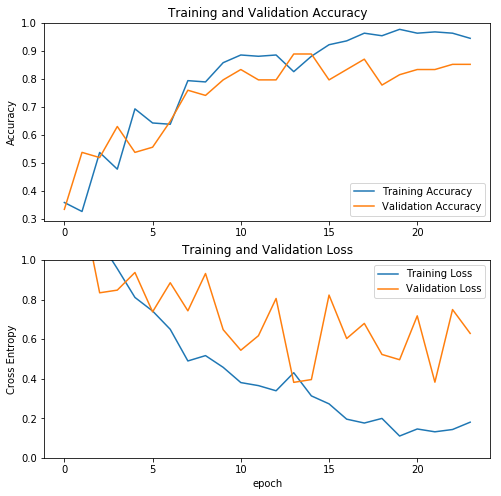

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning
In our feature extraction experiment, you were only training a few layers on top of an MobileNet V2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

### Un-freeze the top layers of the model


All you need to do is unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [0]:
base_model.trainable = True

In [69]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


### Compile the model

Compile the model using a much lower training rate.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 22,392,739
Trainable params: 11,131,395
Non-trainable params: 11,261,344
_________________________________________________________________


In [72]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 39


### Continue Train the model

In [73]:
history_fine = model.fit(train_generator, 
                         epochs=200,
                         callbacks = callbacks,
                         validation_data=validation_generator)

Epoch 1/200
4/4 [==============================] - 6s 1s/step - loss: 0.0331 - acc: 0.9862 - val_loss: 0.3267 - val_acc: 0.8889
Epoch 2/200
4/4 [==============================] - 2s 546ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.5504 - val_acc: 0.9074
Epoch 3/200
4/4 [==============================] - 3s 687ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.7384 - val_acc: 0.9074
Epoch 4/200
4/4 [==============================] - 3s 709ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.5991 - val_acc: 0.8889
Epoch 5/200
4/4 [==============================] - 3s 677ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3802 - val_acc: 0.8889
Epoch 6/200
4/4 [==============================] - 3s 764ms/step - loss: 0.0129 - acc: 0.9954 - val_loss: 0.4841 - val_acc: 0.9074
Epoch 7/200
4/4 [==============================] - 3s 755ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.2549 - val_acc: 0.9444
Epoch 8/200
4/4 [==============================] - 3s 730ms/step - loss: 0.0057 - acc:

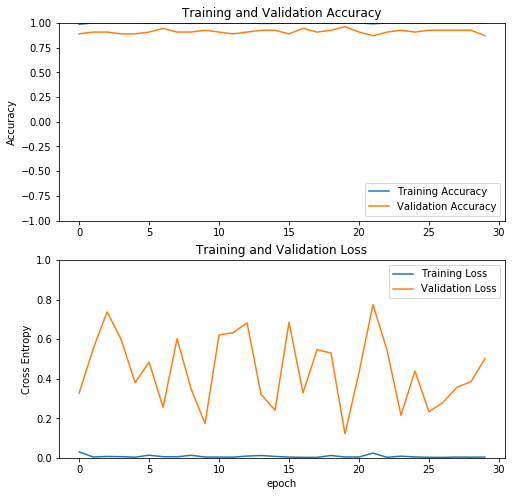

In [74]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Convert to TFLite

Saved the model using `tf.saved_model.save` and then convert the saved model to a tf lite compatible format.

In [0]:
# saved_model_dir = 'save/fine_tuning'
# tf.saved_model.save(model, saved_model_dir)

# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

Download the converted model and labels

In [0]:
# from google.colab import files

# files.download('model.tflite')
# files.download('labels.txt')

Let's take a look at the learning curves of the training and validation accuracy/loss, when fine tuning the last few layers of the MobileNet V2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNet V2 datasets.


In [0]:
classes = {0 : "Chlorophytum comosum", 1 : 'ficus benjamina' , 2 : "philodendron"}
# {'Chlorophytum comosum': 0, 'Ficus Benjamina': 1, 'bromeliads': 2}

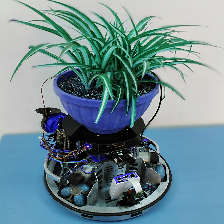

Predicted: Chlorophytum comosum


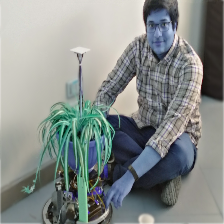

Predicted: Chlorophytum comosum


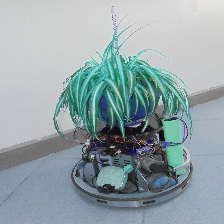

Predicted: Chlorophytum comosum


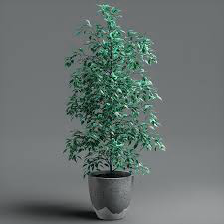

Predicted: ficus benjamina


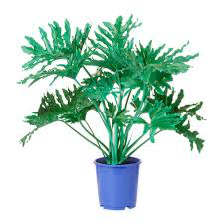

Predicted: philodendron


In [78]:
from keras.preprocessing import image
import numpy as np
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow


img_path = '1.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
cv2_imshow(x)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', classes[np.argmax(preds)])


img_path = 't2.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
cv2_imshow(x)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', classes[np.argmax(preds)])


img_path = 't3.JPG'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
cv2_imshow(x)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', classes[np.argmax(preds)])

img_path = 't4.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
cv2_imshow(x)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', classes[np.argmax(preds)])







img_path = 't5.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
cv2_imshow(x)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', classes[np.argmax(preds)])

In [79]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/tmp/test/",
    batch_size=1,
    class_mode='categorical',
    target_size=(224, 224))

Found 30 images belonging to 3 classes.


In [0]:
predict = model.evaluate_generator(test_generator,steps = 20)

In [81]:
predict

[0.15554097905371975, 0.93333334]

In [82]:
model.metrics_names

['loss', 'acc']